In [8]:
import os
from matplotlib import pyplot as plt
import numpy as np
import cv2

img_folder = "data/checks/entertainment_290/"

Count of images: 3


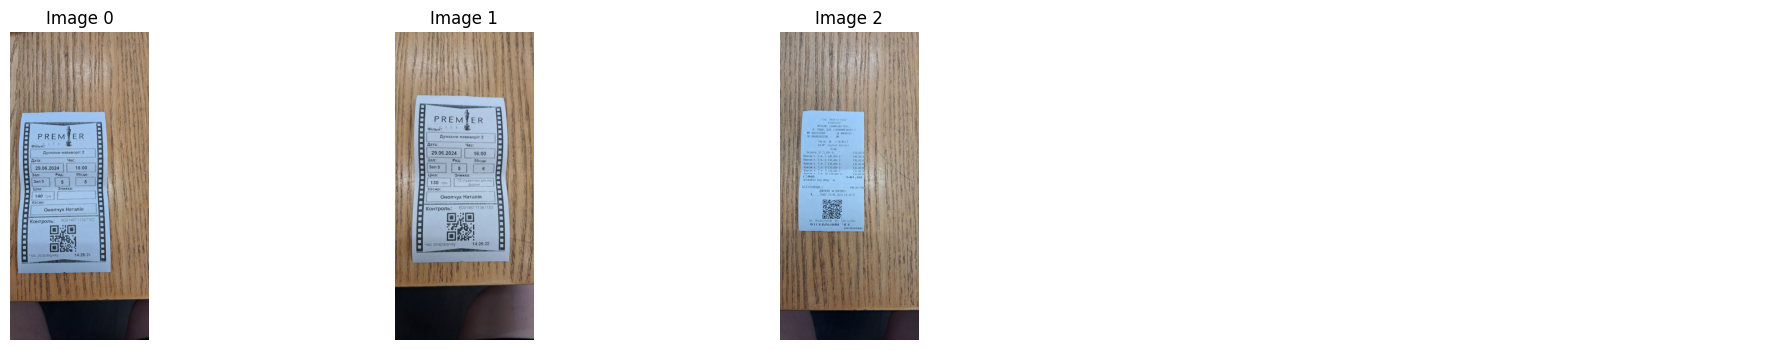

In [35]:
def plot_images(imgs, names = None, cols = 3, with_hist = False, is_gray = False):
    n = len(imgs)
    if names is None:
        names = ["Image " + str(x) for x in range(n)]
    rows = int(np.ceil(n / cols))
    k = 2 if with_hist else 1
    fig, axs = plt.subplots(k * rows, cols, figsize=(24, 4 * k * rows))
    for ax in axs.ravel(): # remove axis from all canvas
        ax.axis("off")
    for i, img in enumerate(imgs):
        if with_hist:
            ax = axs[k * (i // cols) + 1, i % cols]
            ax.hist(img.ravel())
        if k * rows == 1:
            ax = axs[i % cols]
        else:
            ax = axs[k * (i // cols), i % cols]
        if is_gray:
            ax.imshow(img, cmap='gray')
        else:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax.imshow(img)
        ax.set_title(names[i])
        
import glob 
def sanity_check(folder):
    if os.path.isdir(folder):
        print("Folder exists")
    else:
        print("Folder does not exist")
    
def read_imgs(imdir):
    ext = ['jpg', 'png', 'jpeg']    # Add image formats here
    files = []
    [files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
    imgs = [cv2.imread(file) for file in files]
    print('Count of images:', len(imgs))
    return imgs
        
imgs = read_imgs(img_folder)
imgs_original = [img.copy() for img in imgs]
plot_images(imgs[:3], names=None, cols = 5) # Show first 10

In [36]:
def init_trackbars(param_dict, win_name):
    def nothing(x):
        pass
    # Create trackbars
    for param in param_dict:
        min_val, max_val, default_val = param_dict[param]
        cv2.createTrackbar(param, win_name, min_val, max_val, nothing)
        cv2.setTrackbarPos(param, win_name, default_val)
        
# Parameters selection utility
def param_selection(image, param_dict, func):
    # Create a window
    win_name = 'image'
    cv2.namedWindow(win_name)
        
    init_trackbars(param_dict, win_name)

    previous_param_values = np.zeros(len(param_dict), dtype=np.int32)
    current_param_values = np.zeros(len(param_dict), dtype=np.int32)
    
    while(1):
        # Get current parameter values
        current_param_values = [cv2.getTrackbarPos(param, win_name) for param in param_dict.keys()]

        # Check for parameter changes
        if not np.array_equal(previous_param_values, current_param_values):
            result = func(image, current_param_values)  # Apply changes
            param_str = ", ".join(f"{param}={value}" for param, value in zip(param_dict.keys(), current_param_values))
            print(param_str)
            previous_param_values = current_param_values.copy()

        # Display result image
        cv2.imshow(win_name, result)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cv2.destroyWindow("image")
    cv2.destroyAllWindows()

In [56]:
d = {'d': (2, 20, 10), 'sigmaColor': (5, 150, 75), 'sigmaSpace': (5, 150, 75), 'Lower threshold': (0, 255, 50), 'Upper threshold': (0, 255, 200)}
def process(image, vals):
    img = image.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.bilateralFilter(img, vals[0], vals[1], vals[2])
    img = cv2.Canny(img, vals[3], vals[4])
    return img
param_selection(imgs_original[0], d, process)

d=10, sigmaColor=75, sigmaSpace=75, Lower threshold=50, Upper threshold=200
d=10, sigmaColor=75, sigmaSpace=75, Lower threshold=51, Upper threshold=200
d=10, sigmaColor=75, sigmaSpace=75, Lower threshold=53, Upper threshold=200
d=10, sigmaColor=75, sigmaSpace=75, Lower threshold=54, Upper threshold=200
d=10, sigmaColor=75, sigmaSpace=75, Lower threshold=56, Upper threshold=200
d=10, sigmaColor=75, sigmaSpace=75, Lower threshold=58, Upper threshold=200
d=10, sigmaColor=75, sigmaSpace=75, Lower threshold=59, Upper threshold=200
d=10, sigmaColor=75, sigmaSpace=75, Lower threshold=60, Upper threshold=200
d=10, sigmaColor=75, sigmaSpace=75, Lower threshold=76, Upper threshold=200
d=10, sigmaColor=75, sigmaSpace=75, Lower threshold=86, Upper threshold=200
d=10, sigmaColor=75, sigmaSpace=75, Lower threshold=87, Upper threshold=200
d=10, sigmaColor=75, sigmaSpace=75, Lower threshold=86, Upper threshold=200
d=10, sigmaColor=75, sigmaSpace=75, Lower threshold=80, Upper threshold=200
d=10, sigmaC

In [57]:
def process(image, vals=[10, 75, 75, 17, 200]):
    img = image.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.bilateralFilter(img, vals[0], vals[1], vals[2])
    img = cv2.Canny(img, vals[3], vals[4])
    return img

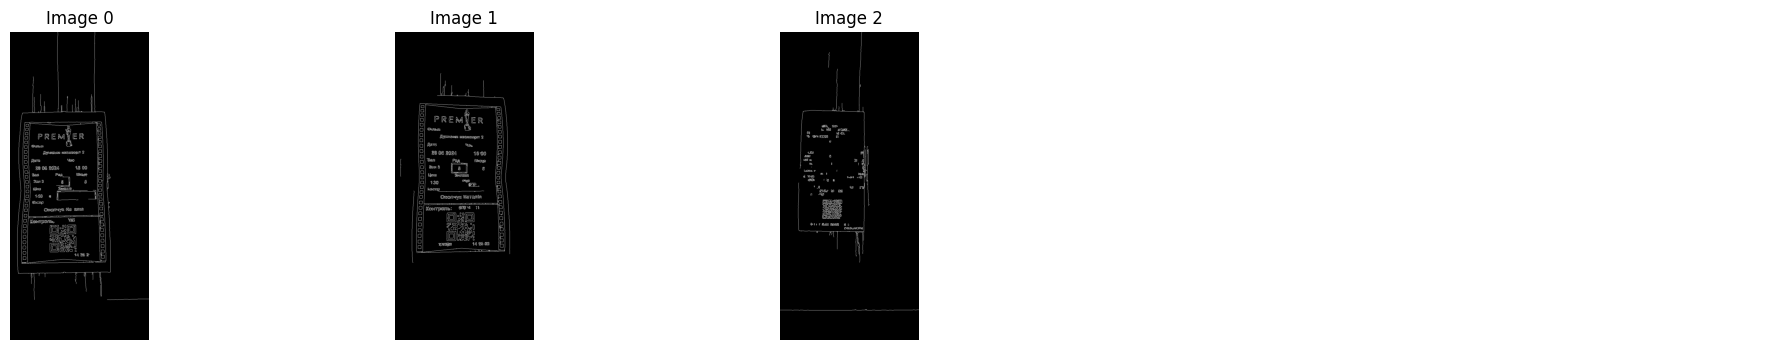

In [59]:
imgs = [process(img) for img in imgs_original]
plot_images(imgs[:3], names=None, cols = 5)

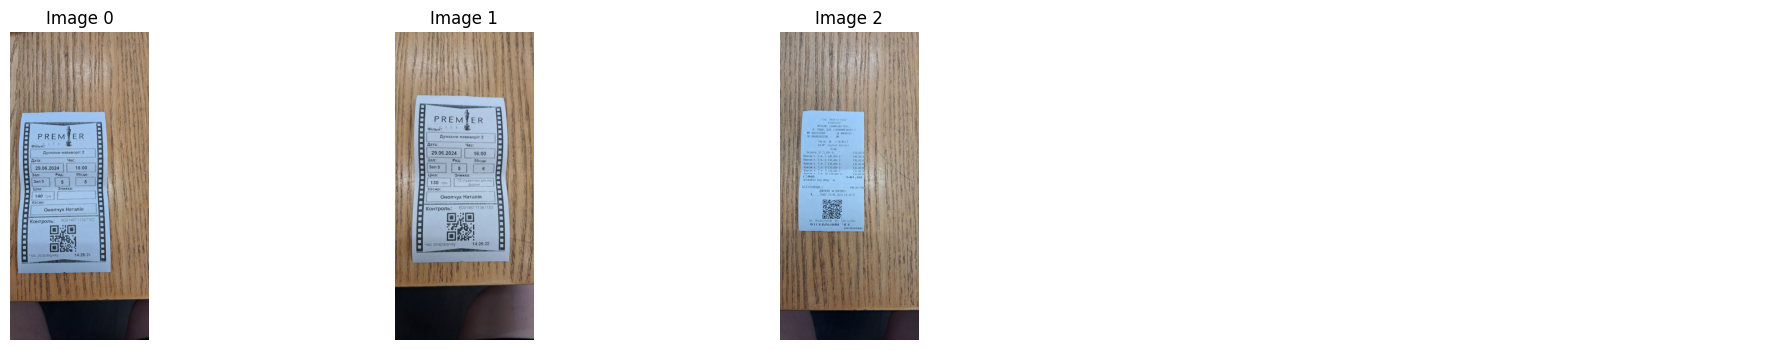

In [60]:
plot_images(imgs_original[:3], names=None, cols = 5)

In [65]:
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
def find_contour(img_original, img):
    # find contours in the edge map, then sort them by their
    # size in descending order
    cnts = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    displayCnt = None
    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        # if the contour has four vertices, then we have found the check
        if len(approx) == 4:
            displayCnt = approx
            break
    if not(displayCnt is None):
        img_original = img_original.copy()
        cv2.drawContours(img_original, displayCnt, -1, (0, 255, 255), 15)
        plt.imshow(img_original)
        print(displayCnt)

[[[165 878]]

 [[166 914]]

 [[201 913]]

 [[200 877]]]


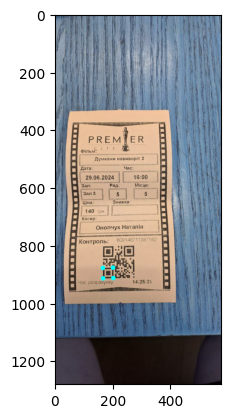

In [66]:
find_contour(imgs_original[0], imgs[0])